비지도 학습 , 군집

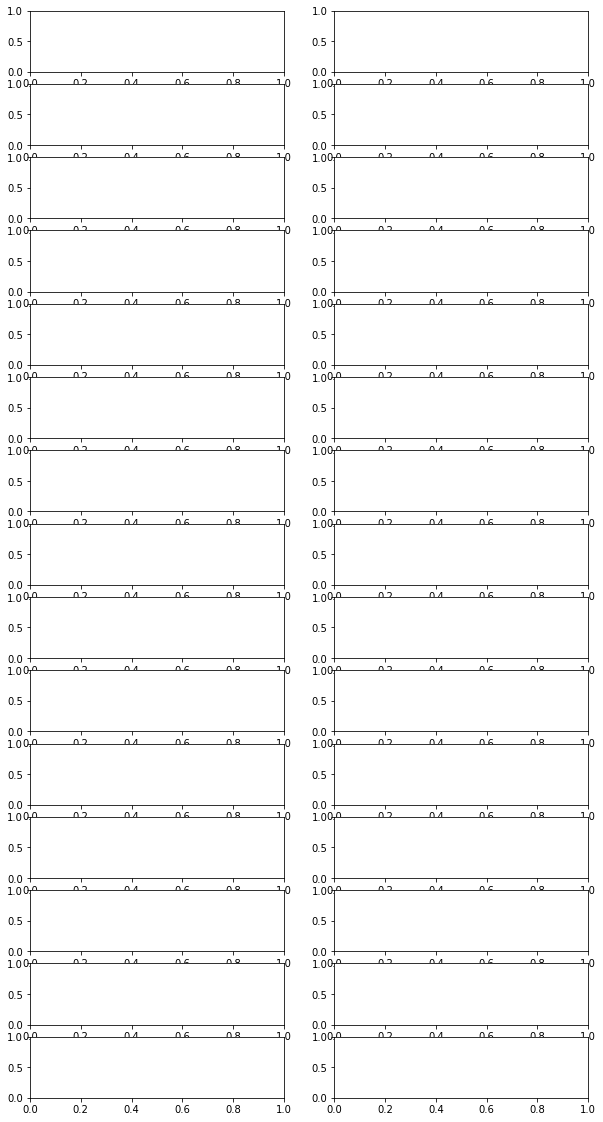

In [41]:
plt.subplots(15,2,figsize=(10,20))
malignant = cancer.data[cancer.target == 0]
bengin = cancer.data[cancer.target == 1]

# 데이터 시각화

## pca #데이터 시각화, hit 맵

- 데이터의 분산이 가장 큼, 수직인 성분을 찾음
- 데이터를 산점도로 시각화 할수 있음

In [3]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

In [11]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [4]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2) #데이터의 처음 두개의 주성분만 유지
pca.fit(X_scaled) #유방암 데이터로 PCA모델을 만듦

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

([<matplotlib.axis.XTick at 0x1ba143928d0>,
 <a list of 30 Text xticklabel objects>)

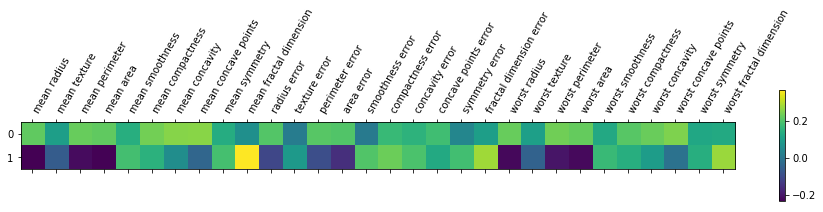

In [8]:
pca.components_.shape #components_ 속성에 주성분이 저장
plt.matshow(pca.components_, cmap='viridis')
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)), cancer.feature_names, rotation=60, ha='left')

In [55]:
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

## NMF

- 음수가 아닌 성분과 계수 값을 찾음, 줏어분과 계수가 모두 0보다 크거나 같아야 함

Text(0, 0.5, '신호')

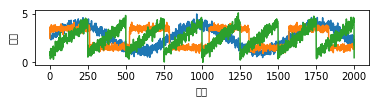

In [18]:
S = mglearn.datasets.make_signals()
plt.figure(figsize=(6,1))
plt.plot(S, '-')
plt.xlabel('시간')
plt.ylabel('신호')

In [23]:
#원본 데이터를 사용해 100개의 측정 데이터를 만듦
A = np.random.RandomState(0).uniform(size=(100,3))
X = np.dot(S, A.T)
print(X.shape)

(2000, 100)


In [31]:
from sklearn.decomposition import NMF
from sklearn.decomposition import PCA

In [35]:
#NMF를 사용해 3개의 신호를 복원
nmf = NMF(n_components=3, random_state=42)
S_ = nmf.fit_transform(X)
print(S.shape)

#PCA
pca = PCA(n_components = 3)
H = pca.fit_transform(X)
print(H.shape)

(2000, 3)
(2000, 3)


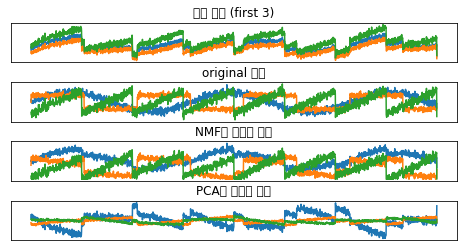

In [42]:
models = [X, S, S_, H]
names = ['측정 신호 (first 3)','original 신호', 'NMF로 복원한 신호', 'PCA로 복원한 신호']
fig, axes = plt.subplots(4, figsize=(8, 4), gridspec_kw={'hspace': .5}, 
                        subplot_kw={'xticks': (), 'yticks': ()})
for model, name, ax in zip(models, names, axes):
    ax.set_title(name)
    ax.plot(model[:,:3], '-')

- NMF는 잘복원함
- PCA는 실패, 데이터 변동을 대부분 첫번째 성분을 사용함

### t-SNE

- 목적이 시각화, 3개 이상 특성을 뽑는 경우가 거의 없음
- 테스트 세트적용 못함, 훈련했던 데이터만 변환 가능
- 데이터 포인트 사이의 거리를 가장 잘 보존하는 2차원 표현을 찾는 것

Text(0, 0.5, '두 번째 주성분')

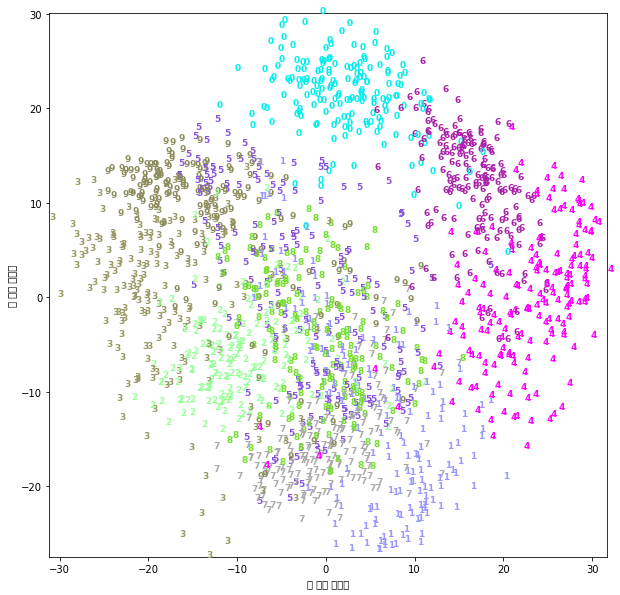

In [60]:
from sklearn.datasets import load_digits
digits = load_digits()

#PCA 모델 생성
pca = PCA(n_components=2)
pca.fit(digits.data)

#처음 두 개의 주성분으로 숫자 데이터를 변환
digits_pca = pca.transform(digits.data)
colors = ['#00eeee', '#9999FF', '#99FF99',
          '#999966', '#FF00FF', '#8855DD', 
          '#aa22aa','#aaaaaa', '#77DD33', '#8d8d5e']

plt.figure(figsize = (10, 10))
plt.xlim(digits_pca[:, 0].min(), digits_pca[:, 0].max())
plt.ylim(digits_pca[:, 1].min(), digits_pca[:, 1].max())

for i in range(len(digits.data)) :
    #숫자 텍스트를 이용해 산점도를 그립니다.
    plt.text(digits_pca[i,0], digits_pca[i,1], str(digits.target[i]),
            color = colors[digits.target[i]],
            fontdict={'weight': 'bold', 'size': 9})
plt.xlabel('첫 번째 주성분')
plt.ylabel('두 번째 주성분')

In [63]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)

# TSNE에는 transform 메서드가 없으므로 대신 fit_transform을 사용
digits_tsne = tsne.fit_transform(digits.data)

Text(0.5, 0, 't-SNE 특성 1')

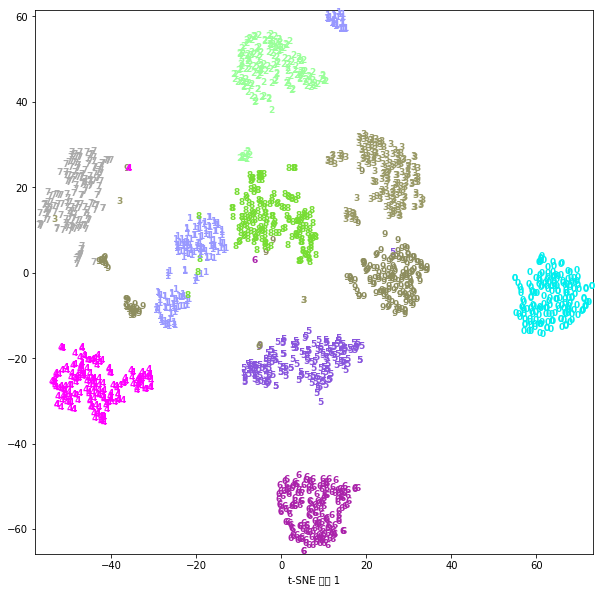

In [65]:
plt.figure(figsize=(10,10))
plt.xlim(digits_tsne[:,0].min(), digits_tsne[:,0].max()+ 1)
plt.ylim(digits_tsne[:,1].min(), digits_tsne[:,1].max()+ 1)
for i in range(len(digits.data)) :
    #숫자 텍스트를 이용해 산점도를 그립니다.
    plt.text(digits_tsne[i,0], digits_tsne[i,1], str(digits.target[i]),
            color = colors[digits.target[i]],
            fontdict={'weight': 'bold', 'size': 9})
plt.xlabel('t-SNE 특성 0')
plt.xlabel('t-SNE 특성 1')

### k-평균 군집

가장 간단

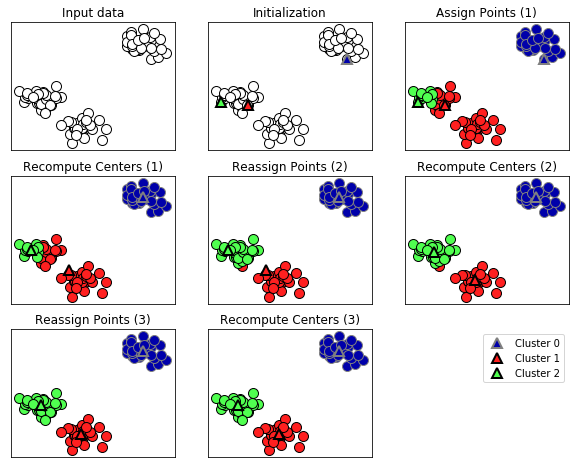

In [3]:
mglearn.plots.plot_kmeans_algorithm()

In [7]:
from sklearn.datasets import make_blobs #랜덤 예제 만들기
from sklearn.datasets import make_moons #랜덤 예제 만들기
from sklearn.cluster import KMeans

In [5]:
#인위적으로 2차원 데이터 만들기 (예제 만듦)
X, y = make_blobs(random_state = 1)

In [6]:
#군집 모델 만들기
kmeans = KMeans(n_clusters=10) #분류를 3개로 하겠다...
kmeans.fit(X) #학습시키기

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [7]:
print(kmeans.labels_)

[0 1 1 1 2 2 2 1 0 0 1 1 2 0 2 2 2 0 1 1 2 1 2 0 1 2 2 0 0 2 0 0 2 0 1 2 1
 1 1 2 2 1 0 1 1 2 0 0 0 0 1 2 2 2 0 2 1 1 0 0 1 2 2 1 1 2 0 2 0 1 1 1 2 0
 0 1 2 2 0 1 0 1 1 2 0 0 0 0 1 0 2 0 0 1 1 2 2 0 2 0]


분류와 비슷, 정답은 모르고 있음 + 레이블 자체에 어떤 의미가 있지는 않음

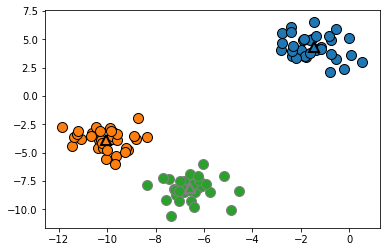

In [10]:
#그래프 그리기
mglearn.discrete_scatter(X[:,0], X[:,1], kmeans.labels_, markers='o') #그래프
mglearn.discrete_scatter( #중앙표시
    kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],[0,1,2],
    markers='^', markeredgewidth=2)

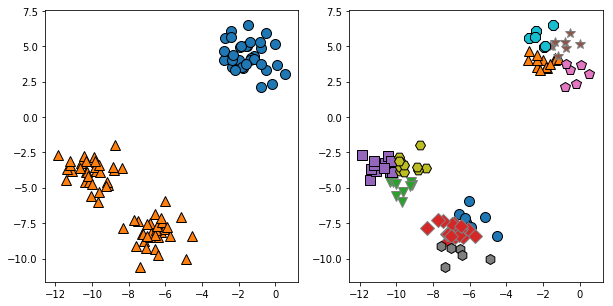

In [16]:
#클러스터 수 늘리거나 줄이기
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

#두 개의 클러스터 중심으로 사용
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
assigments = kmeans.labels_

mglearn.discrete_scatter(X[:,0], X[:,1], assigments, ax=axes[0])

#다섯 개의 클러스터 중심을 사용함
kmeans = KMeans(n_clusters=10)
kmeans.fit(X)
assigments = kmeans.labels_

mglearn.discrete_scatter(X[:,0], X[:,1], assigments, ax=axes[1])

복잡한건 구분하지 못함

### 병합 군집

- 각 포인트를 하나의 클러스트로 지정 -> 어떤 종료 조건을 만족할때까지 가장 비슷한 두 클러스트를 합쳐나감 
    - scikit-learn 종료 조건 : 클러스트 개수
        - 옵션 : ward, average, complete
- linkage 가장 비슷한 클러스트를 측정하는 방법을 지정

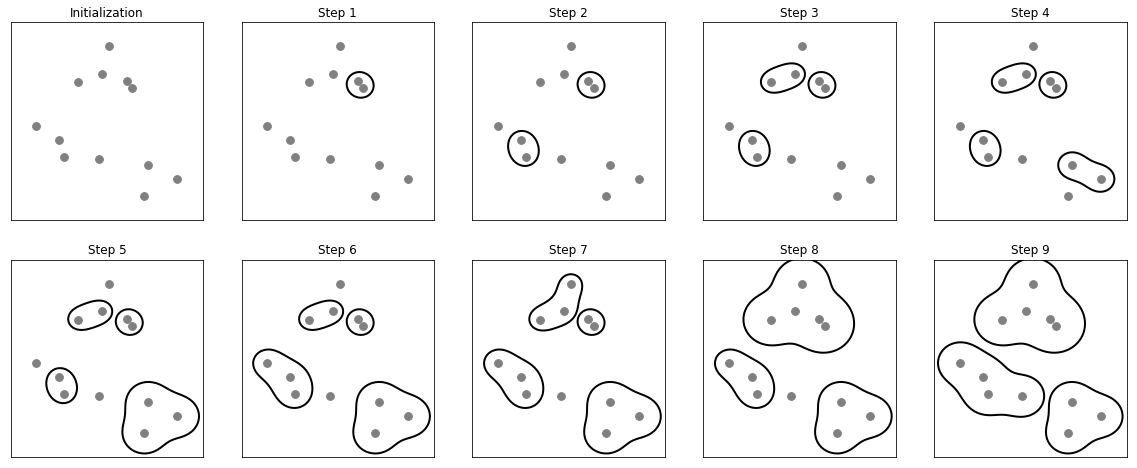

In [66]:
mglearn.plots.plot_agglomerative_algorithm()

Text(0.5, 0, '특성 1')

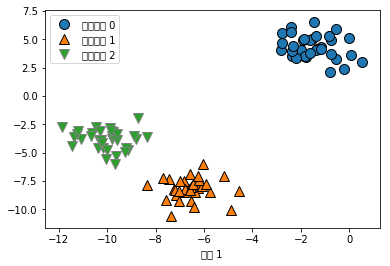

In [14]:
from sklearn.cluster import AgglomerativeClustering
X, y = make_blobs(random_state=1)

agg = AgglomerativeClustering(n_clusters=3)
assigments = agg.fit_predict(X)

mglearn.discrete_scatter(X[:,0],X[:,1],assigments)
plt.legend(['클러스트 0','클러스트 1','클러스트 2'], loc='best')
plt.xlabel('특성 0')
plt.xlabel('특성 1')

### DBSCAN

- 클러스트 개수를 미리 지정할 필요가 없음

In [2]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [9]:
X, y = make_blobs(random_state=0, n_samples=12)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X)
print(clusters)

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


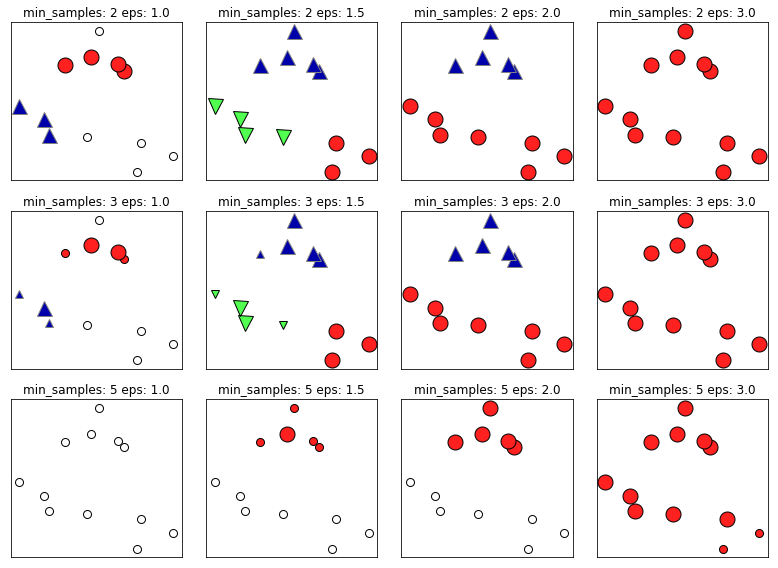

In [10]:
mglearn.plots.plot_dbscan()

Text(0, 0.5, 'feature 1')

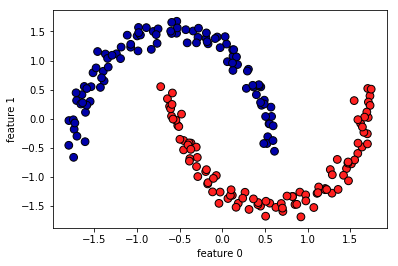

In [21]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

#평균이 0, 부난이 1이 되도록 데이터의 스케일 조정
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

dbscan = DBSCAN() #가르치는 애
clusters = dbscan.fit_predict(X_scaled) #클러스터 

#클러스터 할당을 표시
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=clusters, cmap=mglearn.cm2, s=60, edgecolors='black')
plt.xlabel('feature 0')
plt.ylabel('feature 1')

#### 타깃값으로 군집 평가

In [22]:
from sklearn.metrics.cluster import silhouette_score

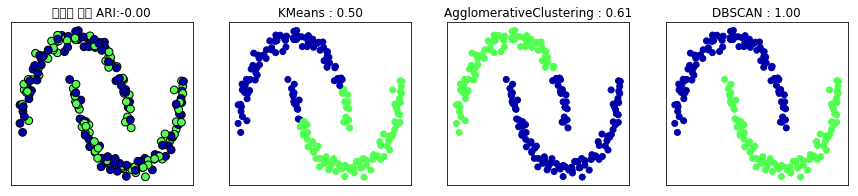

In [37]:
from sklearn.metrics.cluster import adjusted_rand_score

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

fig, axes = plt.subplots(1, 4, figsize=(15,3), subplot_kw={'xticks':(), 'yticks':()})

#사용할 알고리즘 모델을 리스트로
algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2), DBSCAN()]

#비교를 위해 무작의 클러스터를 할당
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

#무작위로 할당한 클러스트를 그림
axes[0].scatter(X_scaled[:,0], X_scaled[:,1], c=random_clusters, cmap=mglearn.cm3, s=60, edgecolors='black')
axes[0].set_title('무작위 할당 ARI:{:.2f}'.format(
    silhouette_score(X_scaled, random_clusters)))

for ax, algorithms in zip(axes[1:], algorithms) :
    clusters = algorithms.fit_predict(X_scaled)
    ax.scatter(X_scaled[:,0], X_scaled[:,1], c=clusters, cmap=mglearn.cm3)
    ax.set_title('{} : {:,.2f}'.format(algorithms.__class__.__name__,adjusted_rand_score(y, clusters)))

#### 타깃값 없이 군집 평가

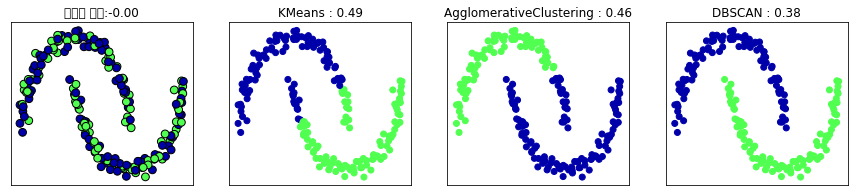

In [27]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

fig, axes = plt.subplots(1, 4, figsize=(15,3), subplot_kw={'xticks':(), 'yticks':()})

#비교를 위해 무작의 클러스터를 할당
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

#무작위로 할당한 클러스트를 그림
axes[0].scatter(X_scaled[:,0], X_scaled[:,1], c=random_clusters, cmap=mglearn.cm3, s=60, edgecolors='black')
axes[0].set_title('무작위 할당:{:.2f}'.format(
    silhouette_score(X_scaled, random_clusters)))
algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2), DBSCAN()]

for ax, algorithms in zip(axes[1:], algorithms) :
    clusters = algorithms.fit_predict(X_scaled)
    ax.scatter(X_scaled[:,0], X_scaled[:,1], c=clusters, cmap=mglearn.cm3)
    ax.set_title('{} : {:,.2f}'.format(algorithms.__class__.__name__,silhouette_score(X_scaled, clusters)))

In [6]:
import pandas as pd
import mglearn
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np

In [7]:
from sklearn.datasets import make_blobs #랜덤 예제 만들기
from sklearn.datasets import make_moons #랜덤 예제 만들기